In [1]:
#Solution to Ex3 by Viduranga Landers
#Score: 44
#This is an overly simplified version to reduce the score

In [15]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [16]:
#Import necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile

import qiskit.tools.jupyter
from qiskit.test.mock import FakeTokyo

In [17]:
#Creates the circuit but you'll see that code qubits are never used.
#You can get rid of them. I didn't as this was done just for fun.
#This circuit is built using the single qubit error correction method on two qubits and the error qubits were 2 syn qubits themselves.

code = QuantumRegister(2,'code')
syn = QuantumRegister(4,'syn')
out = ClassicalRegister(4,'output')

In [18]:
#Define syn circuit
qc_syn = QuantumCircuit(code,syn,out)


qc_syn.cx(syn[0],syn[1])
qc_syn.h(syn[0])



qc_syn.cx(syn[3],syn[2])
qc_syn.h(syn[3])

qc_syn.barrier()

qc_syn.measure(syn,out)

In [19]:
#define quantum circuit
qc_init = QuantumCircuit(code,syn,out)

qc_init.h(syn[0])
qc_init.cx(syn[0],syn[1])
qc_init.h(syn[3])
qc_init.cx(syn[3],syn[2])

qc_init.barrier()

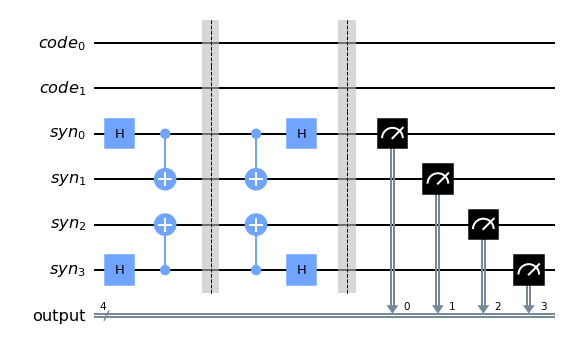

{'0000': 1024}

In [20]:
qc = qc_init.compose(qc_syn)
display(qc.draw('mpl'))

job = Aer.get_backend('qasm_simulator').run(qc)
job.result().get_counts()

In [21]:
#Define error bits
error_qubits = [3,4]

In [22]:
#list out qubits in the circuit
qc.qubits

[Qubit(QuantumRegister(2, 'code'), 0),
 Qubit(QuantumRegister(2, 'code'), 1),
 Qubit(QuantumRegister(4, 'syn'), 0),
 Qubit(QuantumRegister(4, 'syn'), 1),
 Qubit(QuantumRegister(4, 'syn'), 2),
 Qubit(QuantumRegister(4, 'syn'), 3)]

In [23]:
#Define error
def insert(errors,error_qubits,code,syn,out):

    qc_insert = QuantumCircuit(code,syn,out)

    if 'x0' in errors:
        qc_insert.x(error_qubits[0])
    if 'x1' in errors:
        qc_insert.x(error_qubits[1])
    if 'z0' in errors:
        qc_insert.z(error_qubits[0])
    if 'z1' in errors:
        qc_insert.z(error_qubits[1])
        
    return qc_insert

In [24]:
#Insert error
for error in ['x0','x1','z0','z1']:
    
    qc = qc_init.compose(insert([error],error_qubits,code,syn,out)).compose(qc_syn)
    job = Aer.get_backend('qasm_simulator').run(qc)
    
    print('\nFor error '+error+':')
    counts = job.result().get_counts()
    for output in counts:
        print('Output was',output,'for',counts[output],'shots.')


For error x0:
Output was 0010 for 1024 shots.

For error x1:
Output was 0100 for 1024 shots.

For error z0:
Output was 0001 for 1024 shots.

For error z1:
Output was 1000 for 1024 shots.


In [25]:
#Import backend

# Please use the backend given here
backend = FakeTokyo()
backend

<FakeTokyo('fake_tokyo') from None()>

In [26]:
#Compose circuit
qc = qc_init.compose(qc_syn)
qc = transpile(qc, basis_gates=['u','cx'])
qc.num_nonlocal_gates()

4

In [27]:
#Transpile (decompose) circuit to basis gates
qc1 = transpile(qc,backend,basis_gates=['u','cx'], optimization_level=3)
qc1.num_nonlocal_gates()

4

In [28]:
#Define initial qubits
initial_layout = [0,1,5,6,10,11]

In [29]:
#Transpile circuit to basis gates for the Fake_Tokyo backend
qc2 = transpile(qc,backend,initial_layout=initial_layout, basis_gates=['u','cx'], optimization_level=3)
qc2.num_nonlocal_gates()

4